In [1]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
import numpy as np

image size:  720 x 1280
Nose coordinates: (663.9356231689453, 532.4942779541016)


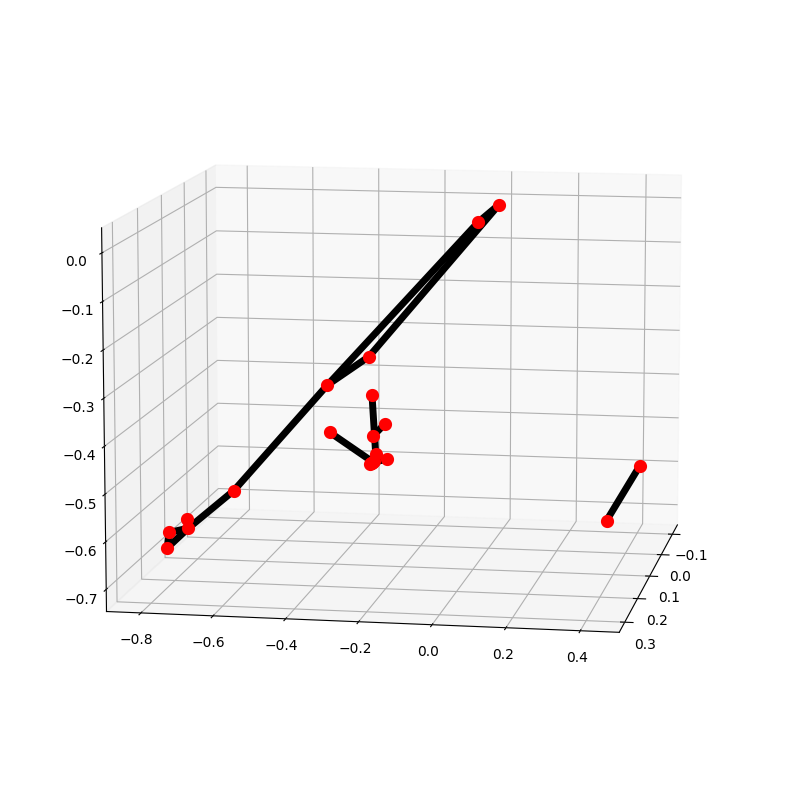

In [3]:
# For static images:
IMAGE_FILES = ['sample_images/downdog1.jpg']
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
    
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        image_height, image_width, _ = image.shape
        cv2.imshow("input image",image)
        print("image size: ", image_height, "x", image_width)
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            continue
        
        print(
            f'Nose coordinates: ('
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
        )

        annotated_image = image.copy()
        
        # Draw segmentation on the image.
        # To improve segmentation around boundaries, consider applying a joint
        # bilateral filter to "results.segmentation_mask" with "image".
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR
        annotated_image = np.where(condition, annotated_image, bg_image)
        
        # Draw pose landmarks on the image.
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        
        cv2.imwrite('/tmp/annotated_image' + str(idx) + '.jpg', annotated_image)
#         cv2.imshow("Annotated Image", annotated_image)
        # Plot pose world landmarks.
        mp_drawing.plot_landmarks(
            results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [ ]:
# # For webcam input:
# cap = cv2.VideoCapture(0)
# with mp_pose.Pose(
#     min_detection_confidence=0.5,
#     min_tracking_confidence=0.5) as pose:
#   while cap.isOpened():
#     success, image = cap.read()
#     if not success:
#       print("Ignoring empty camera frame.")
#       # If loading a video, use 'break' instead of 'continue'.
#       continue

#     # To improve performance, optionally mark the image as not writeable to
#     # pass by reference.
#     image.flags.writeable = False
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     results = pose.process(image)

#     # Draw the pose annotation on the image.
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_pose.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
#     # Flip the image horizontally for a selfie-view display.
#     cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
#     if cv2.waitKey(5) & 0xFF == 27:
#       break
# cap.release()